In [1]:
import ensembles
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
train_data = pd.read_csv('./data/data.csv', index_col=0)
target = pd.read_csv('./data/target.csv', index_col=0)

Удалим id, так как он не несет никакую информацию для модели, и преобразуем date с помощью `LabelEncoder`.

In [4]:
from sklearn.preprocessing import LabelEncoder
train_data.drop(columns='id', inplace=True)

le = LabelEncoder()
train_data['date'] = le.fit_transform(train_data['date'].values)

Разделим выборку с помощью `train_test_split`, взяв 70% за тренировочные данные, а 30% - за тестовые.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_data.values, target.values.reshape(-1), train_size=0.7,
                                                    random_state=13)

## Эксперименты с `RandomForestMSE`:

### Время работы и RMSE от количества деревьев (n_estimators):

In [6]:
from tqdm import tqdm_notebook

n_estimators_list = np.arange(100)
randf_n_estim_stat = {'time': [], 'rmse': [], 'n_estimators': []}


for n_estimators in tqdm_notebook(n_estimators_list):
    start_time = time.time()
    rand_forest = ensembles.RandomForestMSE(n_estimators=n_estimators)
    rand_forest.fit(X_train, y_train)
    preds = rand_forest.predict(X_test)
    randf_n_estim_stat['time'].append(time.time() - start_time)
    randf_n_estim_stat['rmse'].append(np.sqrt(mean_squared_error(y_test, preds)))
    randf_n_estim_stat['n_estimators'].append(n_estimators)
    

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [7]:
plt.style.use('seaborn')
plt.style.use('seaborn-dark-palette')


def plot_graphs(x_arr, y_arr, xlabel='', ylabel='', title='', output_file_name='experiment.pdf'):
    ax = sns.lineplot(x_arr, y_arr)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.savefig(output_file_name)
    plt.show()

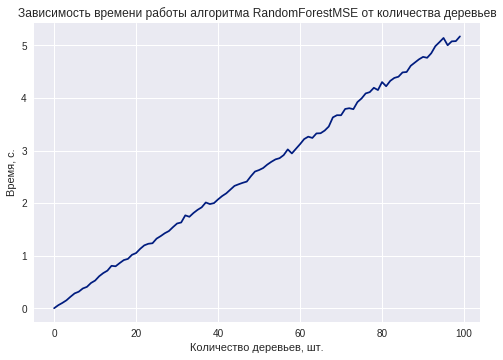

In [8]:
plot_graphs(randf_n_estim_stat['n_estimators'],
            randf_n_estim_stat['time'],
            title='Зависимость времени работы алгоритма RandomForestMSE от количества деревьев',
            xlabel='Количество деревьев, шт.',
            ylabel='Время, с.',
            output_file_name='exp1.pdf')

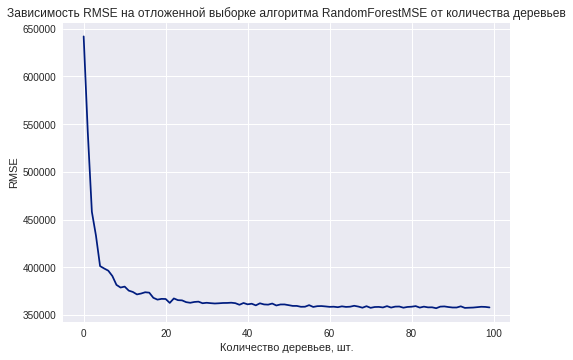

In [9]:
plot_graphs(randf_n_estim_stat['n_estimators'],
            randf_n_estim_stat['rmse'],
            title='Зависимость RMSE на отложенной выборке алгоритма RandomForestMSE от количества деревьев',
            xlabel='Количество деревьев, шт.',
            ylabel='RMSE',
            output_file_name='exp2.pdf')

### Время работы и RMSE от размерности подвыборки признаков для одного дерева:

In [10]:
feature_subsample_size_list = np.arange(X_train.shape[1]) + 1
randf_feat_stat = {'time': [], 'rmse': [], 'feature_subsample_size': []}


for feature_subsample_size in tqdm_notebook(feature_subsample_size_list):
    start_time = time.time()
    rand_forest = ensembles.RandomForestMSE(n_estimators=1, feature_subsample_size=feature_subsample_size)
    rand_forest.fit(X_train, y_train)
    preds = rand_forest.predict(X_test)
    randf_feat_stat['time'].append(time.time() - start_time)
    randf_feat_stat['rmse'].append(np.sqrt(mean_squared_error(y_test, preds)))
    randf_feat_stat['feature_subsample_size'].append(feature_subsample_size)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


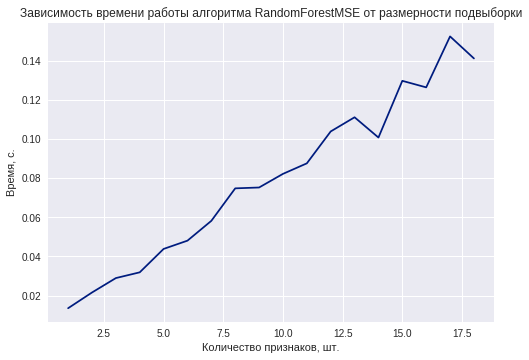

In [11]:
plot_graphs(randf_feat_stat['feature_subsample_size'],
            randf_feat_stat['time'],
            title='Зависимость времени работы алгоритма RandomForestMSE от размерности подвыборки',
            xlabel='Количество признаков, шт.',
            ylabel='Время, с.',
            output_file_name='exp3.pdf')

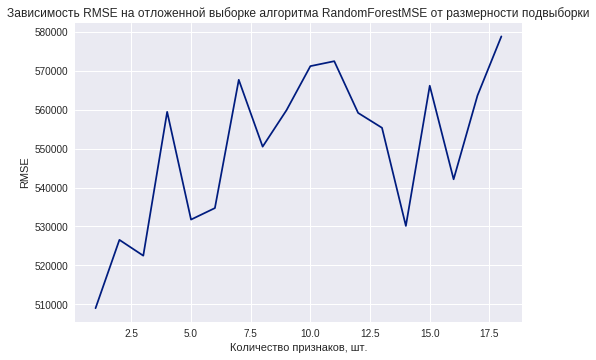

In [12]:
plot_graphs(randf_feat_stat['feature_subsample_size'],
            randf_feat_stat['rmse'],
            title='Зависимость RMSE на отложенной выборке алгоритма RandomForestMSE от размерности подвыборки',
            xlabel='Количество признаков, шт.',
            ylabel='RMSE',
            output_file_name='exp4.pdf')

### Время работы и RMSE от максимальной глубины дерева (+ случай, когда глубина неограничена):

In [13]:
max_depth_list = list(range(1, 101)) + [None]
randf_stat = {'time': [], 'rmse': [], 'max_depth': []}


for max_depth in tqdm_notebook(max_depth_list):
    start_time = time.time()
    rand_forest = ensembles.RandomForestMSE(n_estimators=10, max_depth=max_depth)
    rand_forest.fit(X_train, y_train)
    preds = rand_forest.predict(X_test)
    randf_stat['time'].append(time.time() - start_time)
    randf_stat['rmse'].append(np.sqrt(mean_squared_error(y_test, preds)))
    randf_stat['max_depth'].append(max_depth)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


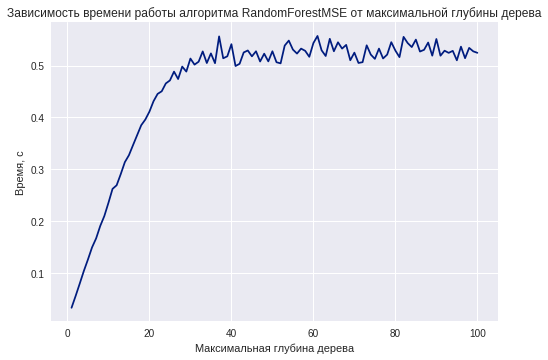

In [14]:
plot_graphs(randf_stat['max_depth'],
            randf_stat['time'],
            title='Зависимость времени работы алгоритма RandomForestMSE от максимальной глубины дерева',
            xlabel='Максимальная глубина дерева',
            ylabel='Время, с',
            output_file_name='exp5.pdf')

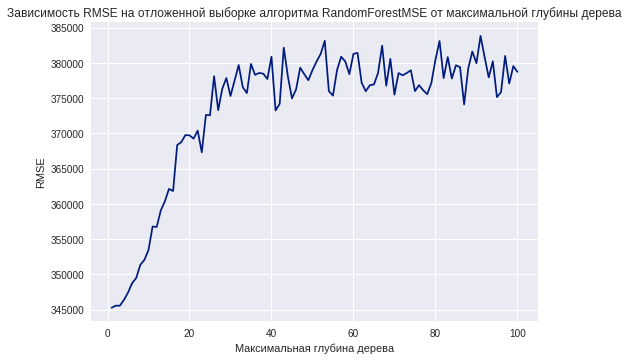

In [15]:
plot_graphs(randf_stat['max_depth'],
            randf_stat['rmse'],
            title='Зависимость RMSE на отложенной выборке алгоритма RandomForestMSE от максимальной глубины дерева',
            xlabel='Максимальная глубина дерева',
            ylabel='RMSE',
            output_file_name='exp6.pdf')

## Эксперименты с `GradientBoostingMSE`:

### Время работы и RMSE от количества деревьев (n_estimators):

In [16]:
n_estimators_list = np.arange(1, 100)
randf_n_estim_stat = {'time': [], 'rmse': [], 'n_estimators': []}


for n_estimators in tqdm_notebook(n_estimators_list):
    start_time = time.time()
    rand_forest = ensembles.GradientBoostingMSE(n_estimators=n_estimators)
    rand_forest.fit(X_train, y_train)
    preds = rand_forest.predict(X_test)
    randf_n_estim_stat['time'].append(time.time() - start_time)
    randf_n_estim_stat['rmse'].append(np.sqrt(mean_squared_error(y_test, preds)))
    randf_n_estim_stat['n_estimators'].append(n_estimators)
    

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


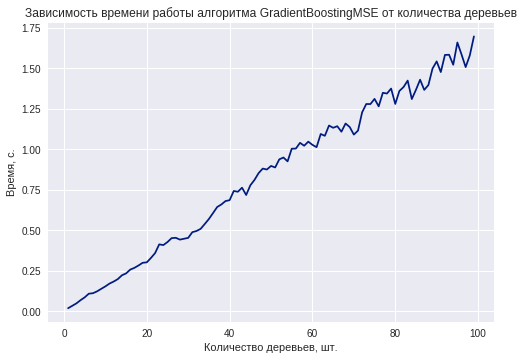

In [17]:
plot_graphs(randf_n_estim_stat['n_estimators'],
            randf_n_estim_stat['time'],
            title='Зависимость времени работы алгоритма GradientBoostingMSE от количества деревьев',
            xlabel='Количество деревьев, шт.',
            ylabel='Время, с.',
            output_file_name='exp7.pdf')

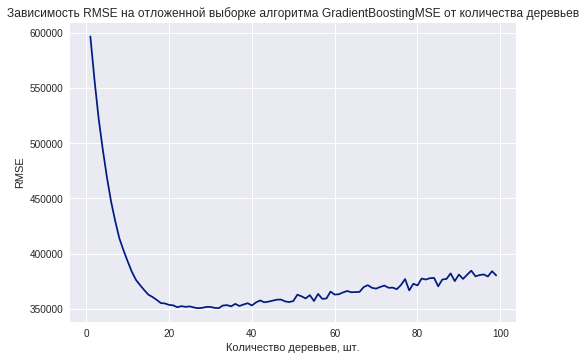

In [18]:
plot_graphs(randf_n_estim_stat['n_estimators'],
            randf_n_estim_stat['rmse'],
            title='Зависимость RMSE на отложенной выборке алгоритма GradientBoostingMSE от количества деревьев',
            xlabel='Количество деревьев, шт.',
            ylabel='RMSE',
            output_file_name='exp8.pdf')

### Время работы и RMSE от максимальной глубины дерева (+ случай, когда глубина неограничена):

In [19]:
feature_subsample_size_list = np.arange(X_train.shape[1]) + 1
randf_feat_stat = {'time': [], 'rmse': [], 'feature_subsample_size': []}


for feature_subsample_size in tqdm_notebook(feature_subsample_size_list):
    start_time = time.time()
    rand_forest = ensembles.GradientBoostingMSE(n_estimators=1, feature_subsample_size=feature_subsample_size)
    rand_forest.fit(X_train, y_train)
    preds = rand_forest.predict(X_test)
    randf_feat_stat['time'].append(time.time() - start_time)
    randf_feat_stat['rmse'].append(np.sqrt(mean_squared_error(y_test, preds)))
    randf_feat_stat['feature_subsample_size'].append(feature_subsample_size)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


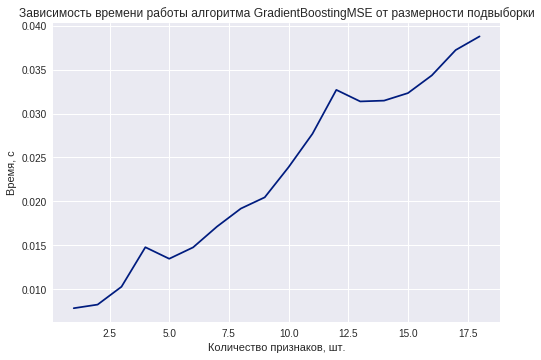

In [20]:
plot_graphs(randf_feat_stat['feature_subsample_size'],
            randf_feat_stat['time'],
            title='Зависимость времени работы алгоритма GradientBoostingMSE от размерности подвыборки',
            xlabel='Количество признаков, шт.',
            ylabel='Время, с',
            output_file_name='exp9.pdf')

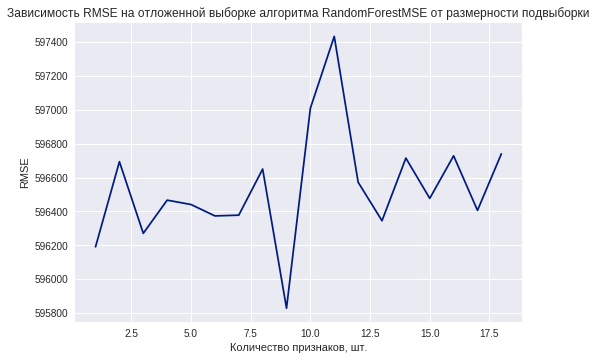

In [21]:
plot_graphs(randf_feat_stat['feature_subsample_size'],
            randf_feat_stat['rmse'],
            title='Зависимость RMSE на отложенной выборке алгоритма RandomForestMSE от размерности подвыборки',
            xlabel='Количество признаков, шт.',
            ylabel='RMSE',
            output_file_name='exp10.pdf')

### Время работы и RMSE от максимальной глубины дерева (+ случай, когда глубина неограничена):

In [22]:
max_depth_list = list(range(1, 101)) + [None]
randf_stat = {'time': [], 'rmse': [], 'max_depth': []}


for max_depth in tqdm_notebook(max_depth_list):
    start_time = time.time()
    rand_forest = ensembles.GradientBoostingMSE(n_estimators=20, max_depth=max_depth)
    rand_forest.fit(X_train, y_train)
    preds = rand_forest.predict(X_test)
    randf_stat['time'].append(time.time() - start_time)
    randf_stat['rmse'].append(np.sqrt(mean_squared_error(y_test, preds)))
    randf_stat['max_depth'].append(max_depth)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


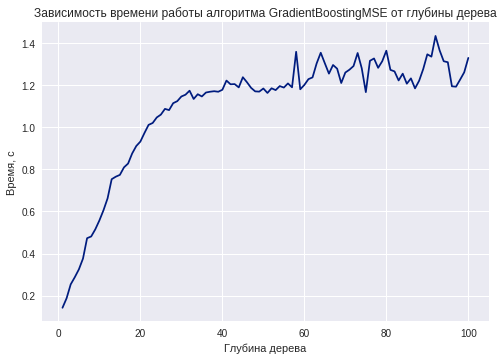

In [23]:
plot_graphs(randf_stat['max_depth'],
            randf_stat['time'],
            title='Зависимость времени работы алгоритма GradientBoostingMSE от глубины дерева',
            xlabel='Глубина дерева',
            ylabel='Время, с',
            output_file_name='exp11.pdf')

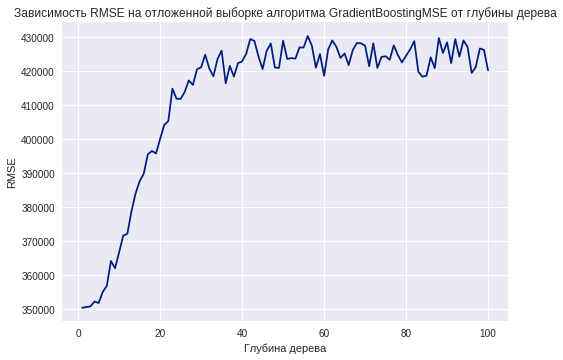

In [24]:
plot_graphs(randf_stat['max_depth'],
            randf_stat['rmse'],
            title='Зависимость RMSE на отложенной выборке алгоритма GradientBoostingMSE от глубины дерева',
            xlabel='Глубина дерева',
            ylabel='RMSE',
            output_file_name='exp12.pdf')